In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

y = Xw + b + e

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [3]:
labels[:]


[ 6.00058699e+00  2.26762152e+00  1.21922855e+01  2.19331312e+00
  1.16779327e+01  9.45502162e-01  4.81350183e+00  3.31076193e+00
  3.67973149e-01  4.37350655e+00  5.92764187e+00  4.89123249e+00
  1.14703417e-01  4.89729834e+00  6.63699627e+00  3.04140449e+00
  3.68024325e+00 -1.09772599e+00  4.24649858e+00  1.76260531e+00
  3.12361550e+00  7.26333475e+00  2.02706981e+00  9.56701851e+00
  7.03674841e+00  9.26425552e+00  4.29679267e-03  3.05101156e+00
  9.62822914e+00  5.14393282e+00  2.61765623e+00  4.65436125e+00
  4.05559874e+00 -1.06317675e+00  1.42257905e+00 -1.48423821e-01
  4.72640228e+00  2.17679954e+00  8.60468769e+00  3.21637201e+00
  2.36237001e+00  4.25050449e+00  8.13547325e+00  5.16207981e+00
 -1.01195765e+00  1.29253113e+00  3.95248842e+00  7.92515612e+00
  7.50782633e+00  2.38162780e+00 -6.62774944e+00 -2.11574531e+00
  4.57787848e+00  2.38421607e+00  3.08520943e-01  5.98483562e+00
  3.86126876e+00  4.92344046e+00  2.90122598e-01  5.80693483e+00
  3.51592278e+00  1.7371

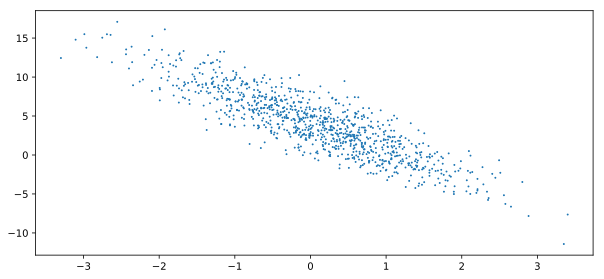

In [4]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(10.0, 4.5)):
    use_svg_display()
    plt.rcParams['figure.figsize']= figsize
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [6]:
batch_size = 1
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-2.7660658 -0.6561834]]
<NDArray 1x2 @cpu(0)> 
[0.89435107]
<NDArray 1 @cpu(0)>


In [7]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [8]:
w.attach_grad()
b.attach_grad()

In [9]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [10]:
def square_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [12]:
lr = 0.03
num_epochs = 30
net = linreg
loss = square_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000052
epoch 2, loss 0.000053
epoch 3, loss 0.000052
epoch 4, loss 0.000052
epoch 5, loss 0.000055
epoch 6, loss 0.000053
epoch 7, loss 0.000050
epoch 8, loss 0.000051
epoch 9, loss 0.000053
epoch 10, loss 0.000052
epoch 11, loss 0.000056
epoch 12, loss 0.000052
epoch 13, loss 0.000050
epoch 14, loss 0.000050
epoch 15, loss 0.000051
epoch 16, loss 0.000052
epoch 17, loss 0.000052
epoch 18, loss 0.000052
epoch 19, loss 0.000051
epoch 20, loss 0.000053
epoch 21, loss 0.000052
epoch 22, loss 0.000052
epoch 23, loss 0.000056
epoch 24, loss 0.000054
epoch 25, loss 0.000050
epoch 26, loss 0.000051
epoch 27, loss 0.000050
epoch 28, loss 0.000052
epoch 29, loss 0.000052
epoch 30, loss 0.000052


In [13]:
true_w, w

([2, -3.4], 
 [[ 1.9985805]
  [-3.4001496]]
 <NDArray 2x1 @cpu(0)>)

In [14]:
true_b, b

(4.2, 
 [4.199193]
 <NDArray 1 @cpu(0)>)